In [13]:
%load_ext autoreload
%autoreload 2

In [30]:
import scanpy as sc
import matplotlib.pyplot as plt

from src.destot.DESTOT import align, xi_to_growth_rate
from src.destot.metrics import growth_distortion_metric, migration_metric

In [2]:
def plot_slice_value(slice, value_vec, vmax=None, vmin=None):
    """
    Parameters: 
    slice: AnnData object of the slice
    value_vec: growth vector

    Returns:
    Plots the slice with each spot colored according to its value in value_vec
    """
    plt.figure()
    spatial = slice.obsm['spatial']
    sc = plt.scatter(spatial[:, 0], spatial[:, 1], c=value_vec, cmap='RdYlGn', s=50, vmin=vmin, vmax=vmax)
    cbar = plt.colorbar(sc)
    cbar.ax.tick_params(labelsize=20)
    plt.gca().invert_yaxis()
    plt.axis('off')

    fig = plt.gcf()
    fig_size = fig.get_size_inches()
    new_width = 20.0
    new_height = new_width * (fig_size[1] / fig_size[0])
    fig.set_size_inches(new_width, new_height)
    plt.show()
    return

In [8]:
slice_54 = sc.read_h5ad('/n/fs/ragr-data/users/xinhao/axolotl/development/Stage54.h5ad')
slice_57 = sc.read_h5ad('/n/fs/ragr-data/users/xinhao/axolotl/development/Stage57.h5ad')

In [9]:
slice_54.X = slice_54.layers['counts']
slice_57.X = slice_57.layers['counts']

In [22]:
Pi, xi = align(slice_54, slice_57, alpha=0.2, gamma=50, epsilon=0.1, max_iter=100, 
               balanced=False, use_gpu=False, normalize_xi=True, check_convergence=False)

/n/fs/ragr-research/users/xinhao/miniconda3/envs/spatiotemporal_gpu/lib/python3.9/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


Iteration: 0
Iteration: 5
Iteration: 10
Iteration: 15
Iteration: 20
Iteration: 25
Iteration: 30
Iteration: 35
Iteration: 40
Iteration: 45
Iteration: 50
Iteration: 55
Iteration: 60
Iteration: 65
Iteration: 70
Iteration: 75
Iteration: 80
Iteration: 85
Iteration: 90
Iteration: 95


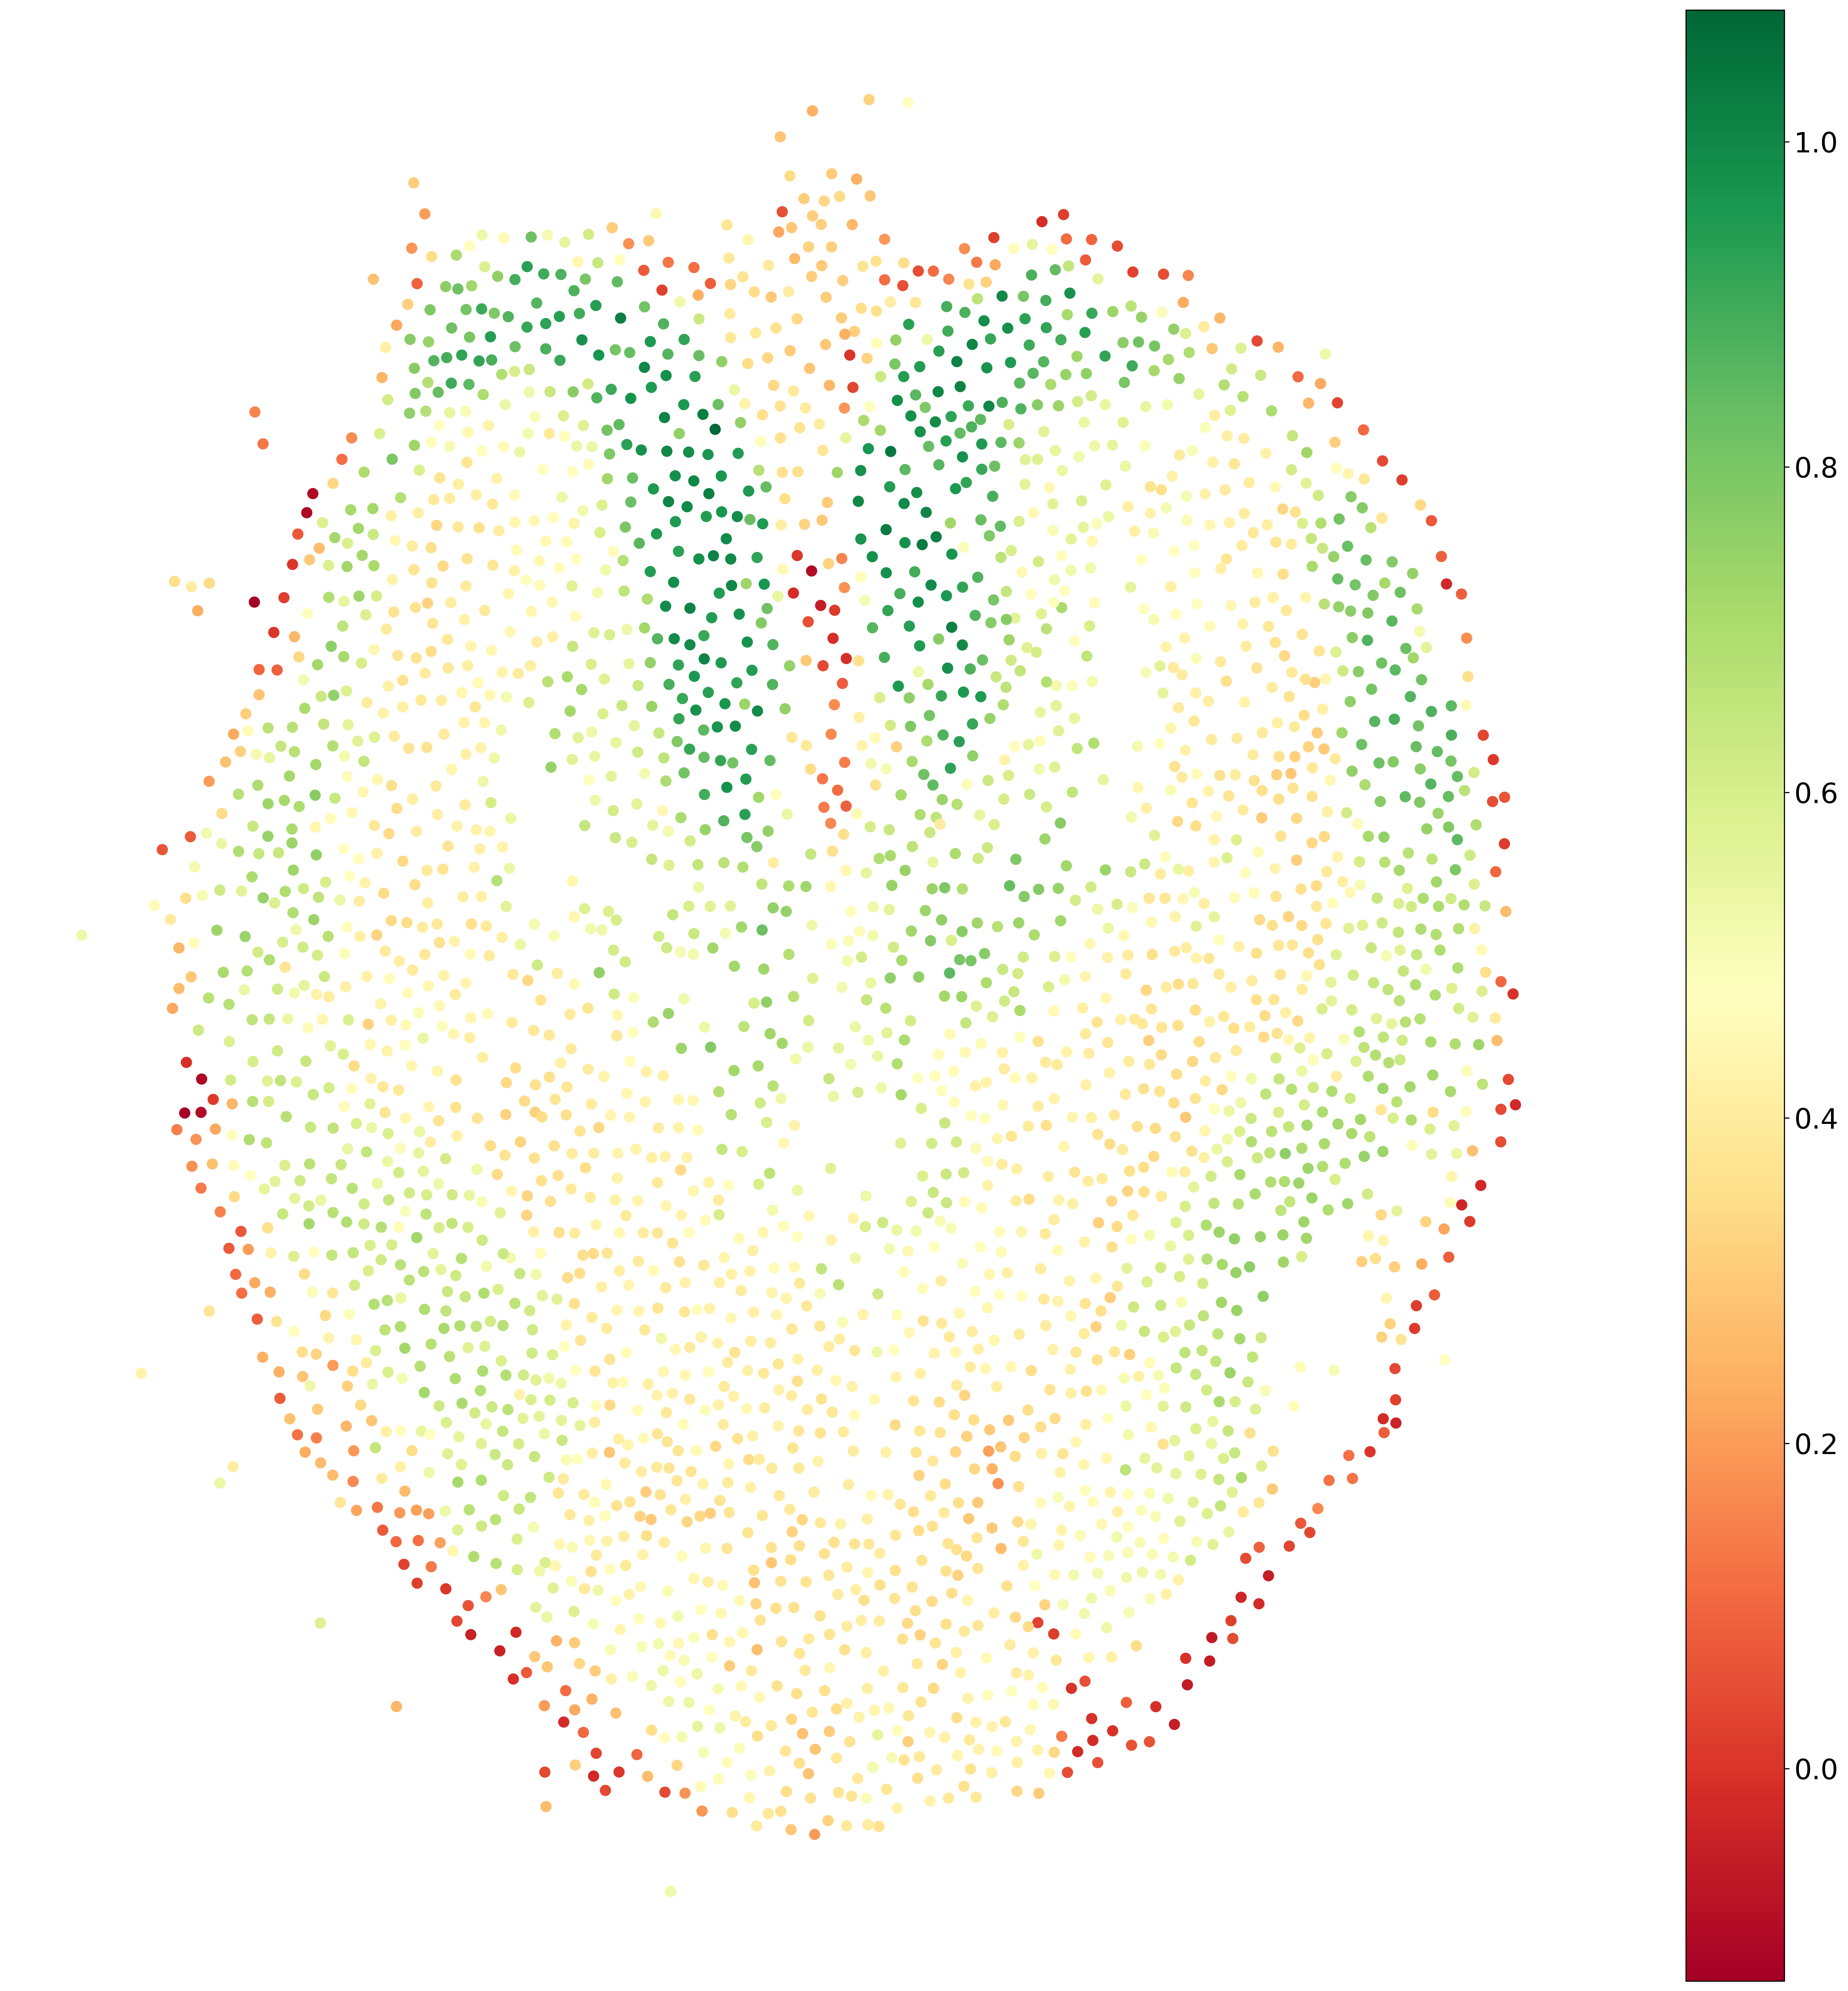

In [23]:
plot_slice_value(slice_54, xi)

In [31]:
print(migration_metric(slice_54, slice_57, Pi))

504.0071412746082


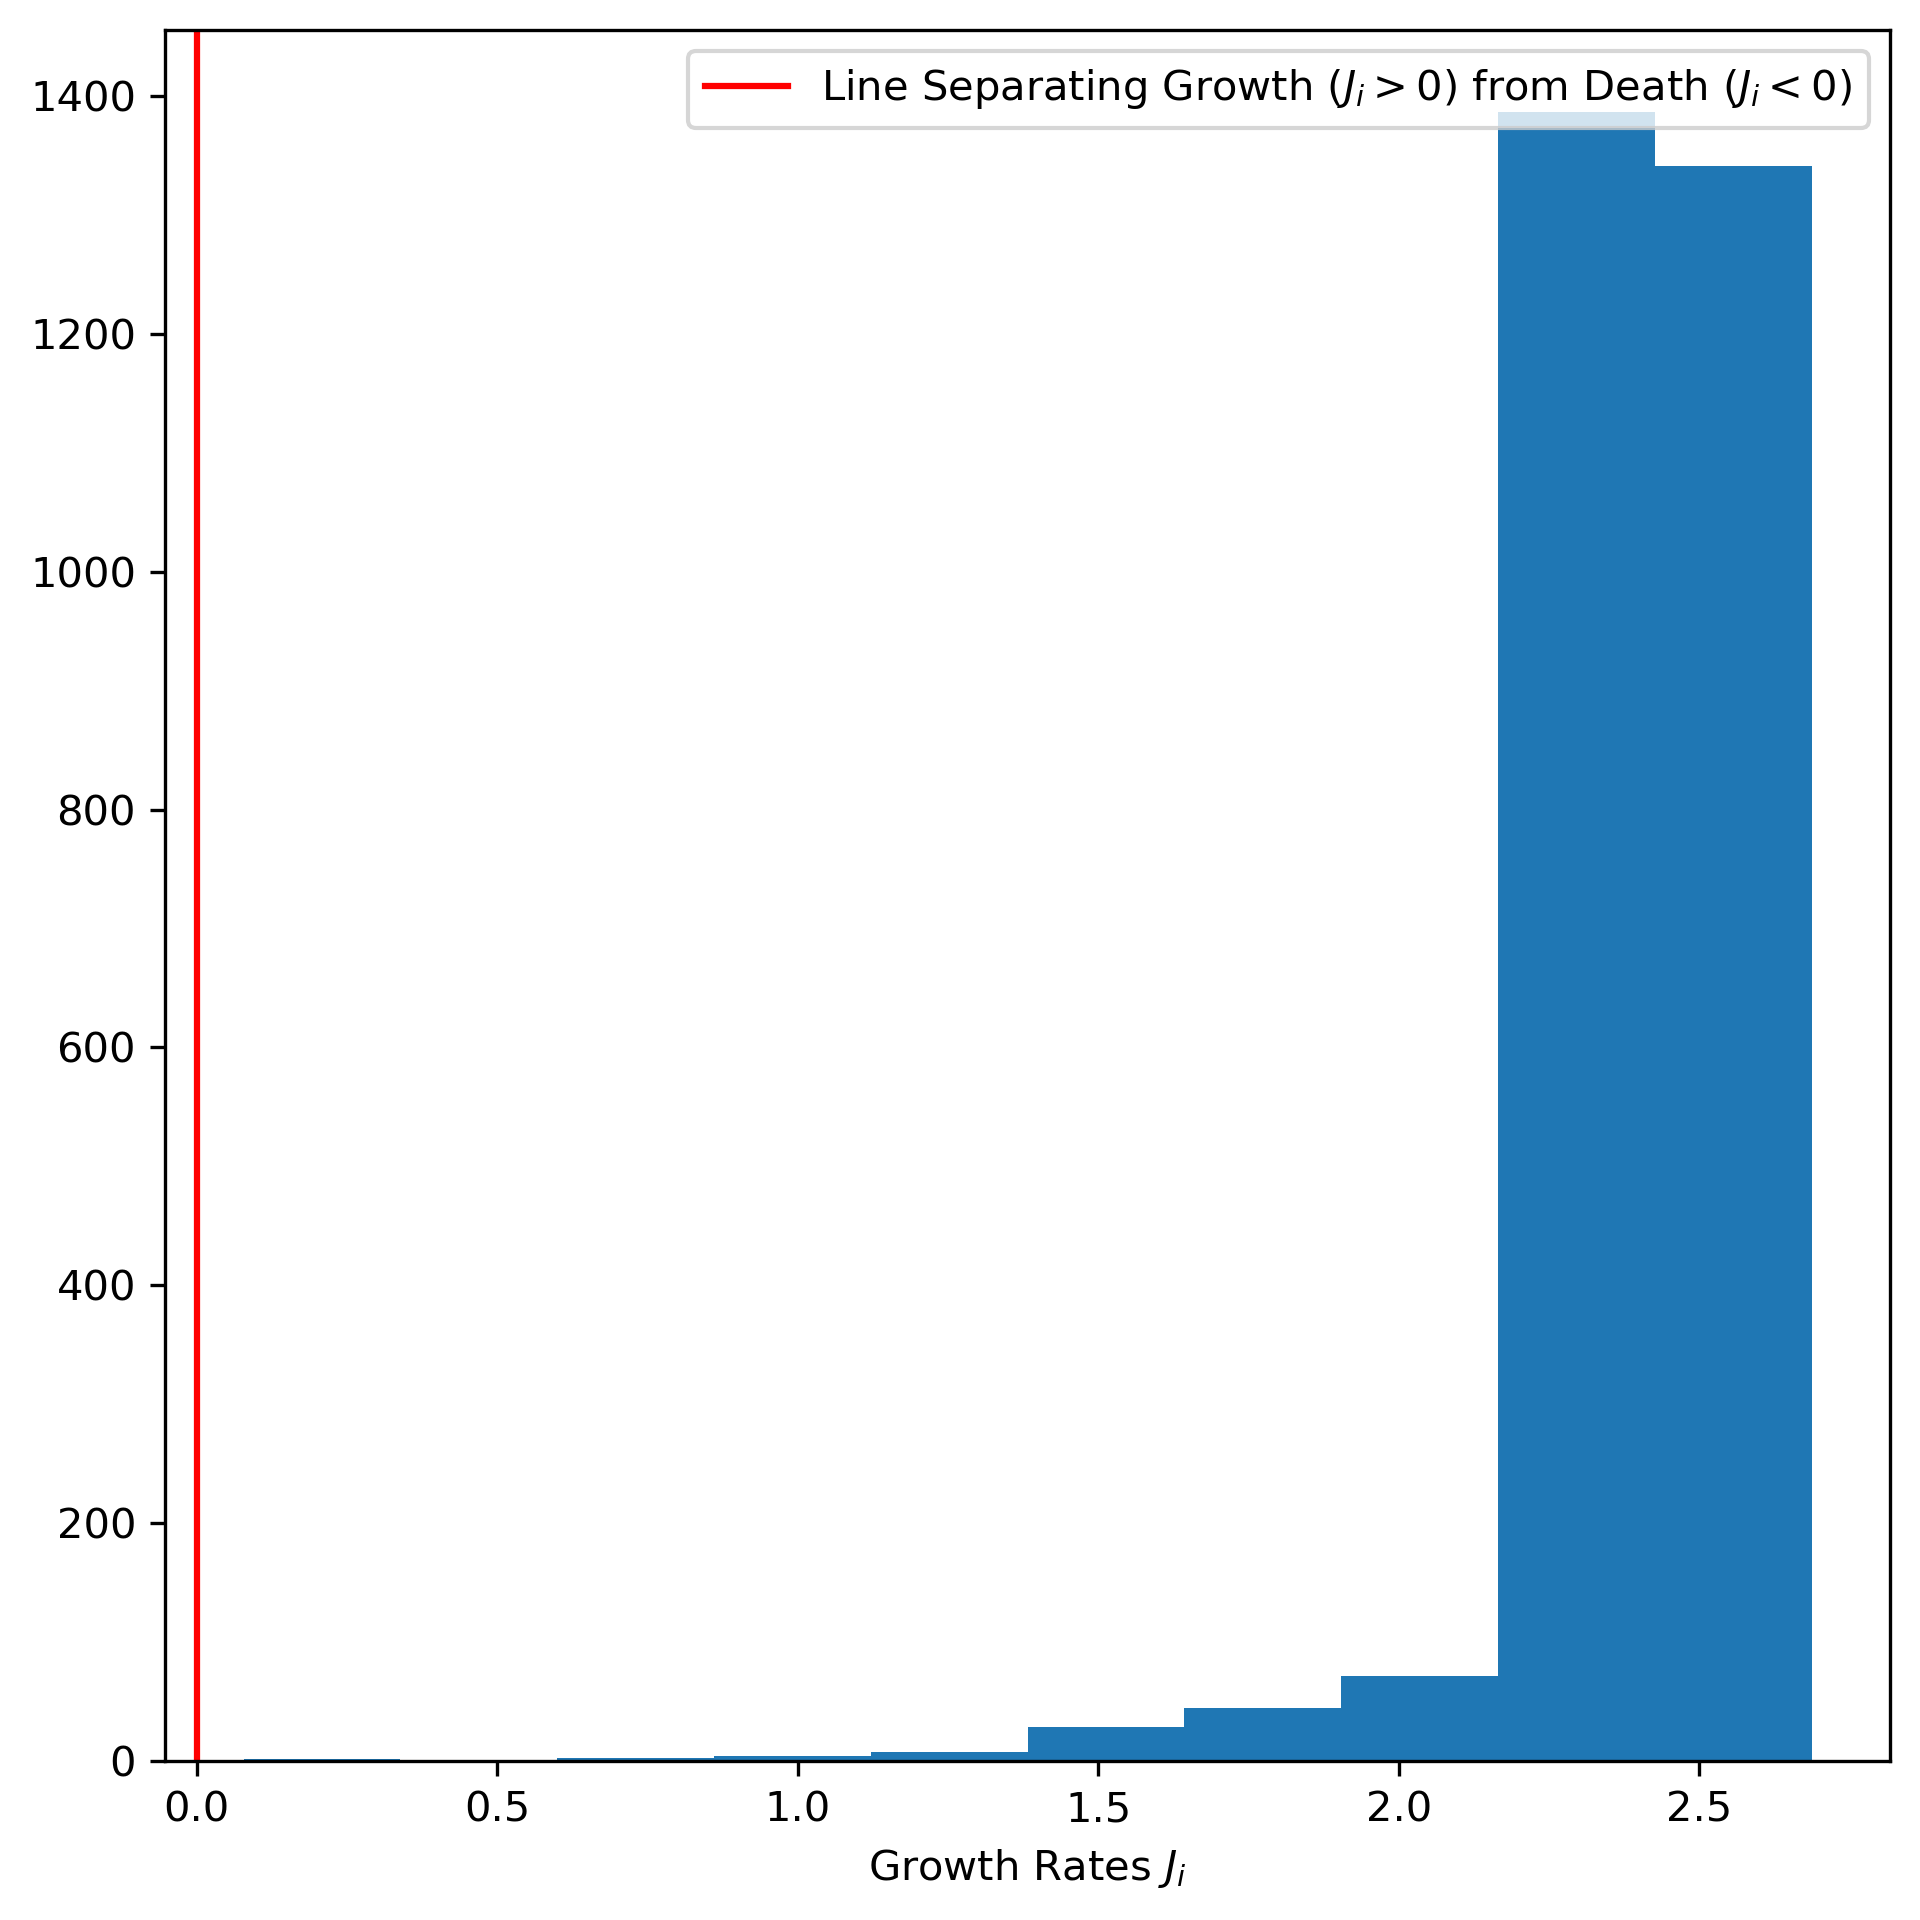

In [29]:
plt.rcParams["figure.figsize"] = [6.50, 6.50]
plt.rcParams["figure.autolayout"] = True
plt.rcParams['figure.dpi'] = 300
Js = xi_to_growth_rate(xi, t1=54, t2=57)
plt.hist(Js)
plt.axvline(x=0, c='r', label='Line Separating Growth ($J_{i} > 0$) from Death ($J_{i} < 0$)')
plt.xlabel('Growth Rates $J_{i}$')
plt.legend()
plt.show()